In [1]:
from histogram_manager import HistogramManager
import ROOT
import atlasplots
atlasplots.set_atlas_style()

Welcome to JupyROOT 6.14/04
Applying ATLAS style settings


In [2]:
hm = HistogramManager("/project/def-psavard/ladamek/momentumvalidationoutput/Apr18_defaultcorr_latest_mc_v05_standardvars_matrix/Output.root")
hm.list_histograms("Mass")
hm.list_histograms("PT")
hm.list_histograms("Weight")
hm.merge_channels("MC", ["MC{}".format(p) for p in ["1516", "17", "18"]])

Initializing histogram manager on file /project/def-psavard/ladamek/momentumvalidationoutput/Apr18_defaultcorr_latest_mc_v05_standardvars_matrix/Output.root
Found these channels in the file []


IndexError: list index out of range

Error in <TFile::TFile>: file /project/def-psavard/ladamek/momentumvalidationoutput/Apr18_defaultcorr_latest_mc_v05_standardvars_matrix/Output.root does not exist


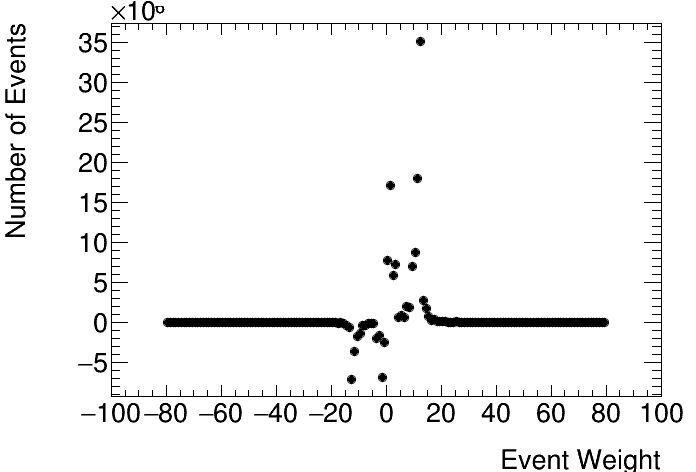

In [3]:
histograms = hm.get_histograms("WeightVariable_ID")
canvas_sherpa = ROOT.TCanvas()
histograms["MCSherpa"].Draw()
canvas_sherpa.Draw()

-100.49999989725 -0.0
-99.49999990275 -0.0
-98.49999990825 -0.0
-97.49999991375 -0.0
-96.49999991925 -0.0
-95.49999992475 -0.0
-94.49999993025 -0.0
-93.49999993575001 -0.0
-92.49999994125001 -0.0
-91.49999994675001 -0.0
-90.49999995225001 -0.0
-89.49999995775 -0.0
-88.49999996325 -0.0
-87.49999996875 -0.0
-86.49999997425 -0.0
-85.49999997975 -0.0
-84.49999998525 -0.0
-83.49999999075001 -0.0
-82.49999999625001 -0.0
-81.50000000175001 -0.0
-80.50000000725001 -0.0
-79.50000001275001 16.012952022263594
-78.50000001825 16.996478617416024
-77.50000002375 21.00865940557673
-76.50000002925 15.971802749012108
-75.50000003475 22.01621038168816
-74.50000004025 20.017026442395636
-73.50000004575 20.993611329174524
-72.50000005125 27.00112408011828
-71.50000005675 26.010272558948742
-70.50000006225001 32.00486568573916
-69.50000006775001 22.986770936801225
-68.50000007325 24.99520436976305
-67.50000007875 29.001903019730705
-66.50000008425 34.02170403551427
-65.50000008975 38.0125511755128
-64.5000

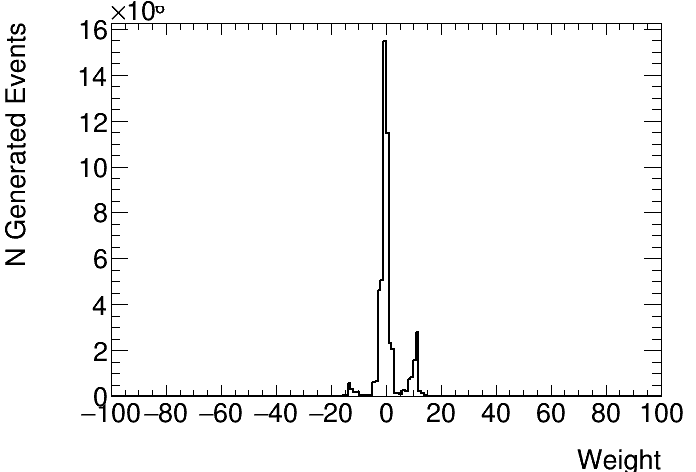

In [4]:
sherpa_weight_profile = ROOT.TH1D("Weight", "Weight", histograms["MCSherpa"].GetNbinsX() + 2, -100.0, 100.0)
sherpa_weight_profile.GetXaxis().SetTitle("Weight")
sherpa_weight_profile.GetYaxis().SetTitle("N Generated Events")
for i in range(0, histograms["MCSherpa"].GetNbinsX() + 1):
    print(histograms["MCSherpa"].GetBinCenter(i), histograms["MCSherpa"].GetBinContent(i)/histograms["MCSherpa"].GetBinCenter(i))
    sherpa_weight_profile.SetBinContent(i, histograms["MCSherpa"].GetBinContent(i)/histograms["MCSherpa"].GetBinCenter(i))
canvas = ROOT.TCanvas("SherpaWeights2", "SherpaWeights2")
sherpa_weight_profile.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: SherpaWeights2


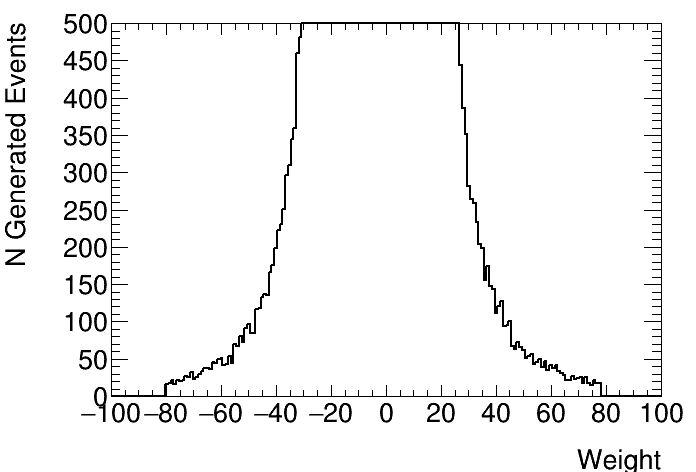

In [6]:
canvas = ROOT.TCanvas("SherpaWeights2", "SherpaWeights2")
sherpa_weight_profile.SetMinimum(0.0)
sherpa_weight_profile.SetMaximum(500.0)
sherpa_weight_profile.Draw()
canvas.Draw()

-100.49999989725 -0.0
-99.49999990275 -0.0
-98.49999990825 -0.0
-97.49999991375 -0.0
-96.49999991925 -0.0
-95.49999992475 -0.0
-94.49999993025 -0.0
-93.49999993575001 -0.0
-92.49999994125001 -0.0
-91.49999994675001 -0.0
-90.49999995225001 -0.0
-89.49999995775 -0.0
-88.49999996325 -0.0
-87.49999996875 -0.0
-86.49999997425 -0.0
-85.49999997975 -0.0
-84.49999998525 -0.0
-83.49999999075001 -0.0
-82.49999999625001 -0.0
-81.50000000175001 -0.0
-80.50000000725001 -0.0
-79.50000001275001 -0.0
-78.50000001825 -0.0
-77.50000002375 -0.0
-76.50000002925 -0.0
-75.50000003475 -0.0
-74.50000004025 -0.0
-73.50000004575 -0.0
-72.50000005125 -0.0
-71.50000005675 -0.0
-70.50000006225001 -0.0
-69.50000006775001 -0.0
-68.50000007325 -0.0
-67.50000007875 -0.0
-66.50000008425 -0.0
-65.50000008975 -0.0
-64.50000009525002 -0.0
-63.500000100750015 -0.0
-62.500000106250006 -0.0
-61.500000111750005 -0.0
-60.50000011725 -0.0
-59.50000012275001 -0.0
-58.50000012825001 -0.0
-57.50000013375001 -0.0
-56.50000013925000

Warning in <TROOT::Append>: Replacing existing TH1: Weight (Potential memory leak).


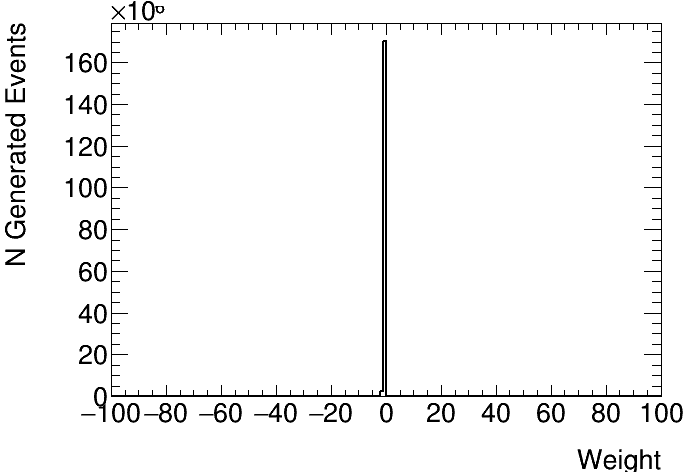

In [7]:
weight_profile = ROOT.TH1D("Weight", "Weight", histograms["MCSherpa"].GetNbinsX() + 2, -100.0, 100.0)
weight_profile.GetXaxis().SetTitle("Weight")
weight_profile.GetYaxis().SetTitle("N Generated Events")
for i in range(0, histograms["MC"].GetNbinsX() + 1):
    print(histograms["MC"].GetBinCenter(i), histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))
    weight_profile.SetBinContent(i, histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))
canvas = ROOT.TCanvas("Weights2", "Weights2")
weight_profile.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Weights2


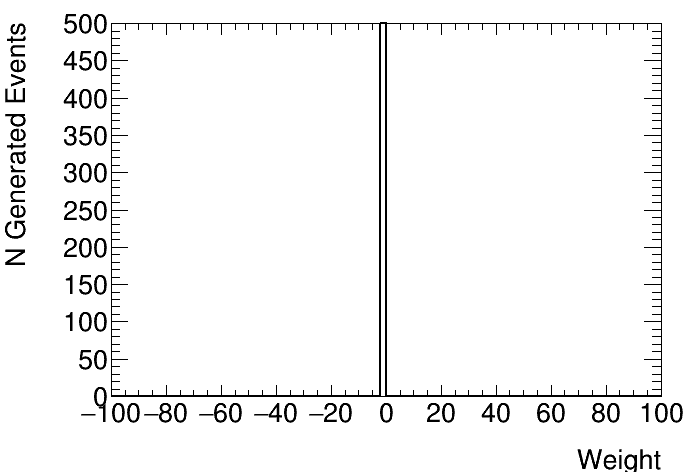

In [8]:
canvas = ROOT.TCanvas("Weights2", "Weights2")
weight_profile.SetMinimum(0.0)
weight_profile.SetMaximum(500.0)
weight_profile.Draw()
canvas.Draw()

In [9]:
for i in range(0, histograms["MC"].GetNbinsX() + 1):
    print(histograms["MC"].GetBinCenter(i), histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))

-100.49999989725 -0.0
-99.49999990275 -0.0
-98.49999990825 -0.0
-97.49999991375 -0.0
-96.49999991925 -0.0
-95.49999992475 -0.0
-94.49999993025 -0.0
-93.49999993575001 -0.0
-92.49999994125001 -0.0
-91.49999994675001 -0.0
-90.49999995225001 -0.0
-89.49999995775 -0.0
-88.49999996325 -0.0
-87.49999996875 -0.0
-86.49999997425 -0.0
-85.49999997975 -0.0
-84.49999998525 -0.0
-83.49999999075001 -0.0
-82.49999999625001 -0.0
-81.50000000175001 -0.0
-80.50000000725001 -0.0
-79.50000001275001 -0.0
-78.50000001825 -0.0
-77.50000002375 -0.0
-76.50000002925 -0.0
-75.50000003475 -0.0
-74.50000004025 -0.0
-73.50000004575 -0.0
-72.50000005125 -0.0
-71.50000005675 -0.0
-70.50000006225001 -0.0
-69.50000006775001 -0.0
-68.50000007325 -0.0
-67.50000007875 -0.0
-66.50000008425 -0.0
-65.50000008975 -0.0
-64.50000009525002 -0.0
-63.500000100750015 -0.0
-62.500000106250006 -0.0
-61.500000111750005 -0.0
-60.50000011725 -0.0
-59.50000012275001 -0.0
-58.50000012825001 -0.0
-57.50000013375001 -0.0
-56.50000013925000

Applying ATLAS style settings
FullCovCBComb
Initializing histogram manager on file /project/def-psavard/ladamek/momentumvalidationoutput/May16_defaultcorr_fullcovcbcomb_latest_mc_v05_standardvars_matrix/Output.root
Found these channels in the file ['Data', 'DataTEST', 'MC', 'MCSherpa', 'MCMadGraph', 'MCTTbar', 'MC_JPSI', 'Data1516', 'Data17', 'Data18', 'MC1516', 'Data18_Rel22', 'Data17_Rel22', 'MC17_stat_up', 'MC18_stat_up', 'MC1516_stat_up', 'MC17_stat_down', 'MC18_stat_down', 'MC1516_stat_down', 'MC17_scale_up', 'MC18_scale_up', 'MC1516_scale_up', 'MC17_scale_down', 'MC18_scale_down', 'MC1516_scale_down', 'MC17_res_up', 'MC18_res_up', 'MC1516_res_up', 'MC17_res_down', 'MC18_res_down', 'MC1516_res_down', 'MC17', 'MC18', 'MCSherpa1516', 'MCSherpa17', 'MCSherpa18', 'MC1516_JPSI', 'MC17_JPSI', 'MC18_JPSI', 'MCTTbar1516', 'MCTTbar17', 'MCTTbar18']
Mean, ID MC1516 90.67126252533657
RMS, ID MC1516 4.094763366065576
Mean, ID Data1516 90.66289352468056
RMS, ID Data1516 4.174962853262796
Mean,

Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC1516 MassSpectrum_ID_InclusiveData1516 MassSpectrum_ID_InclusiveMCTTbar1516.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC17 MassSpectrum_ID_InclusiveData17 MassSpectrum_ID_InclusiveMCTTbar17.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC18 MassSpectrum_ID_InclusiveData18 MassSpectrum_ID_InclusiveMCTTbar18.pdf has been created


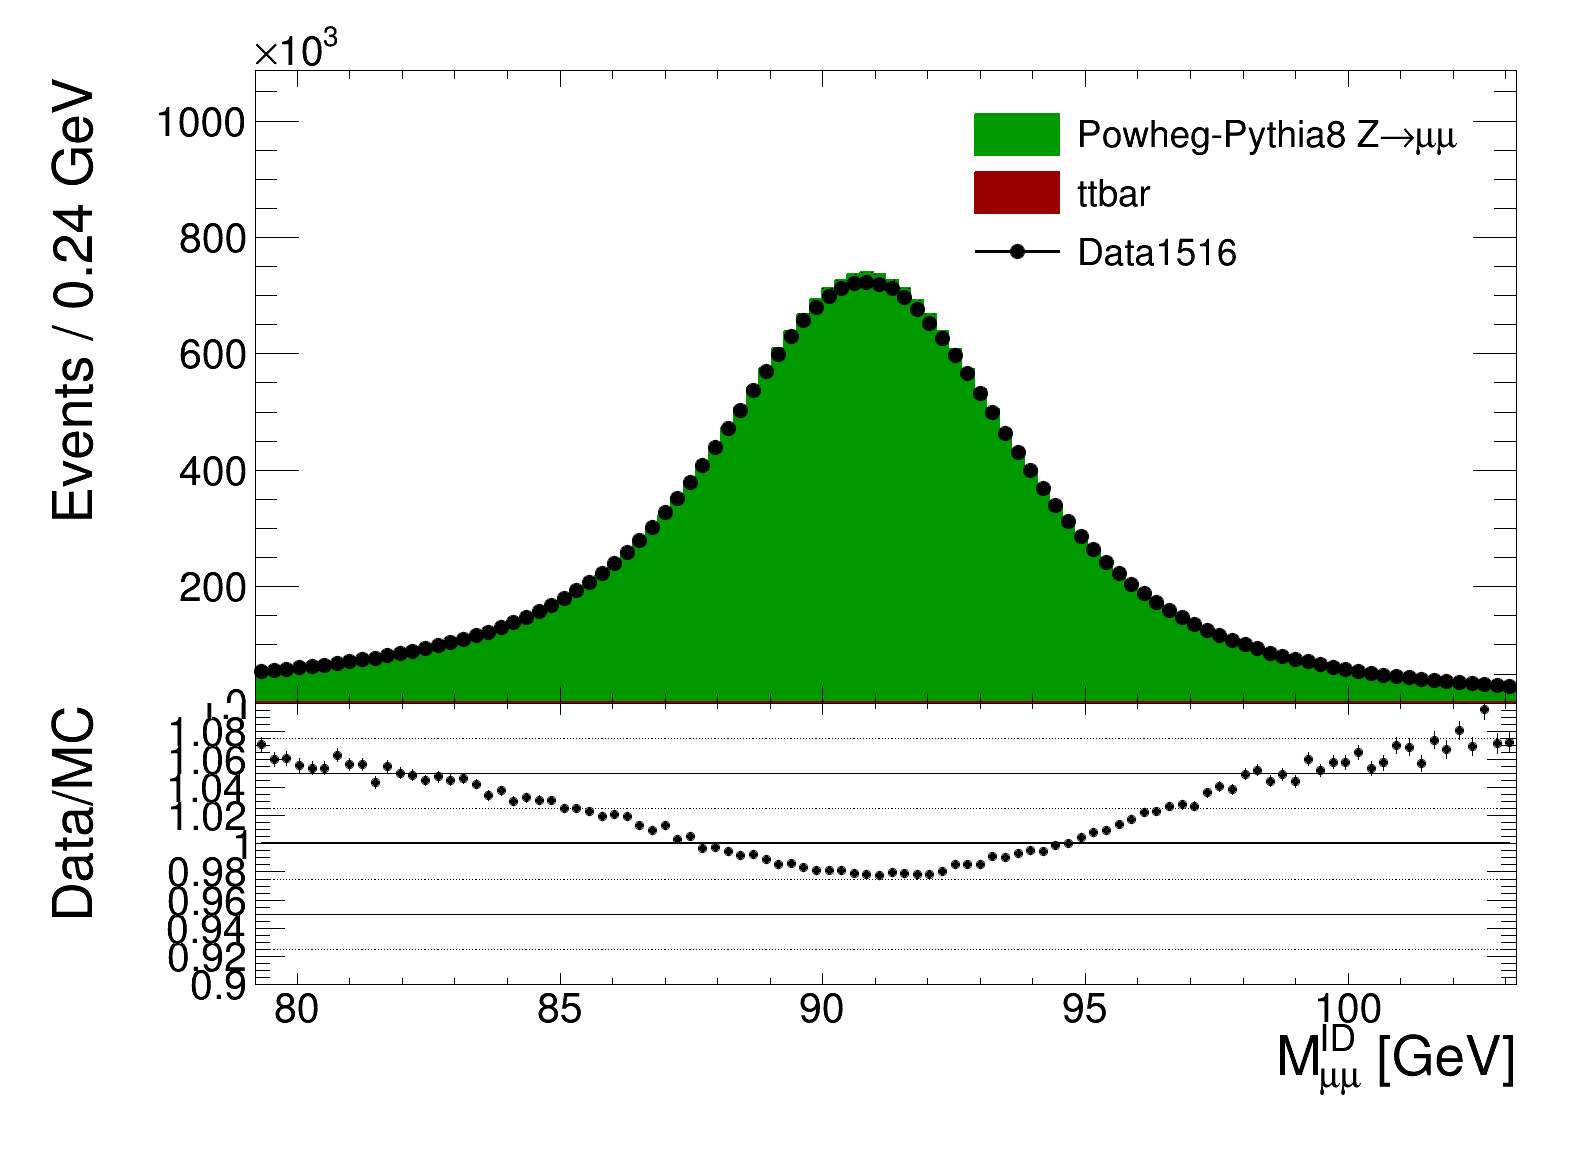

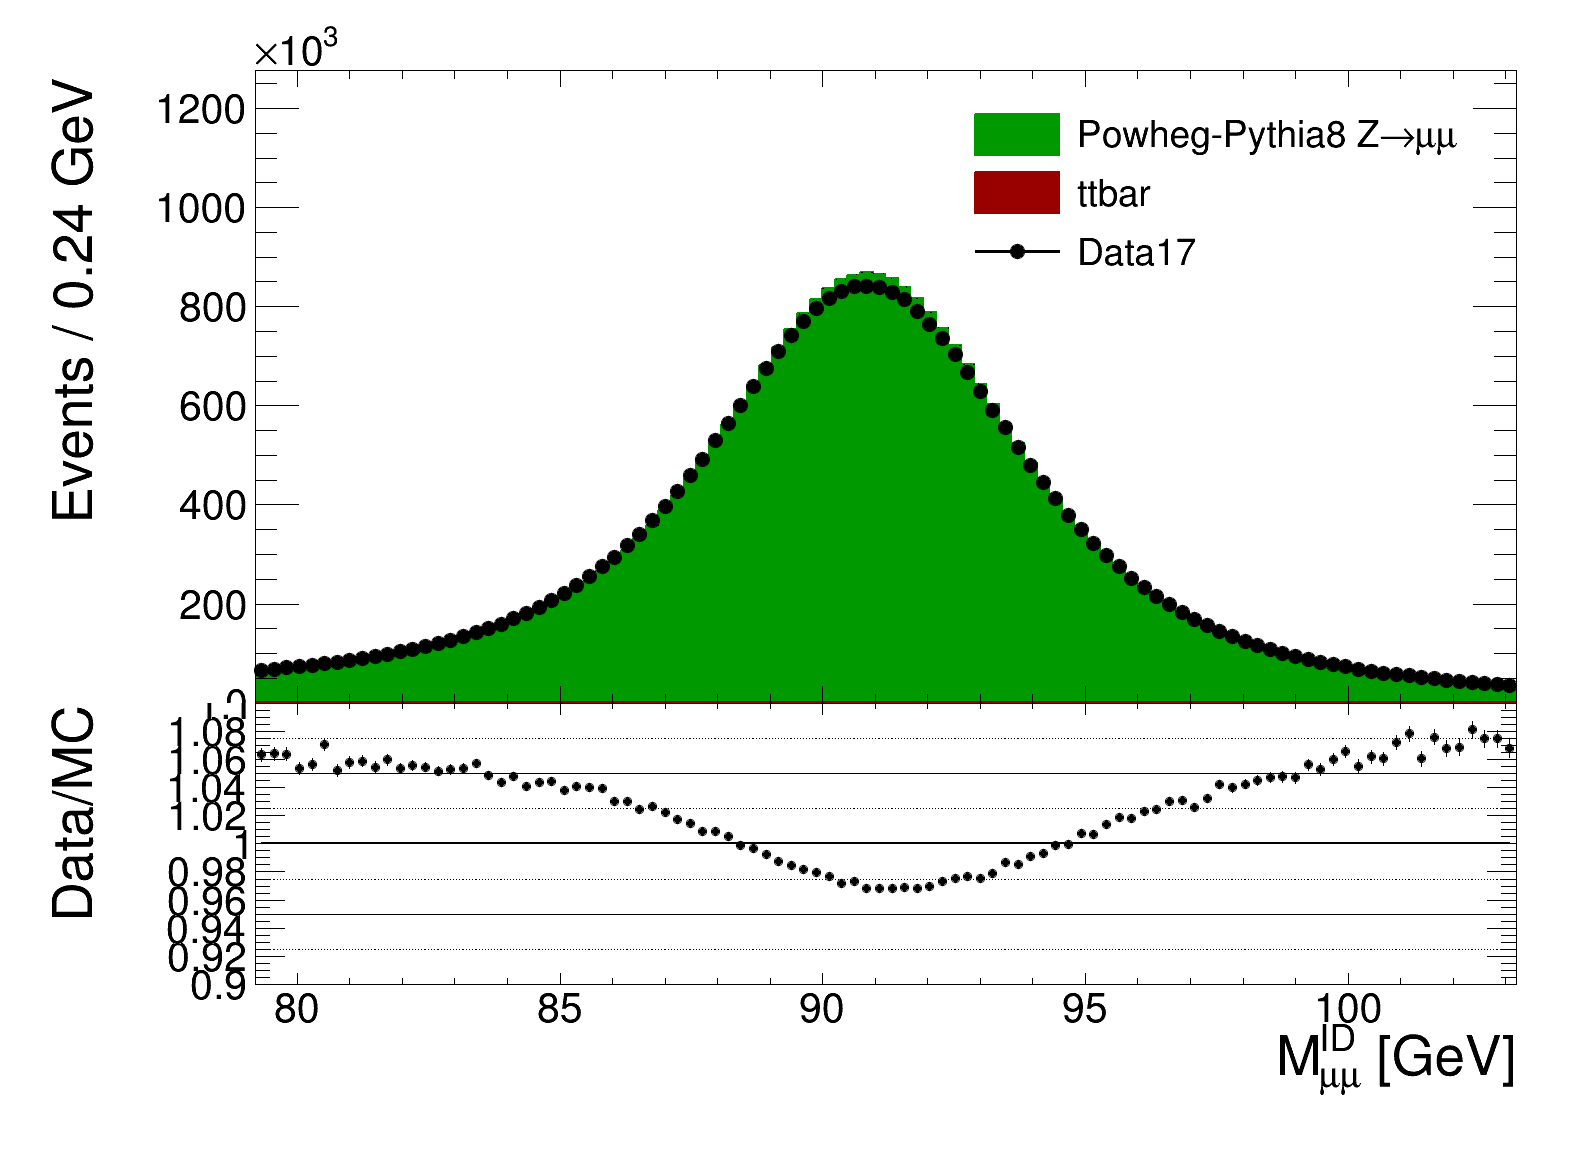

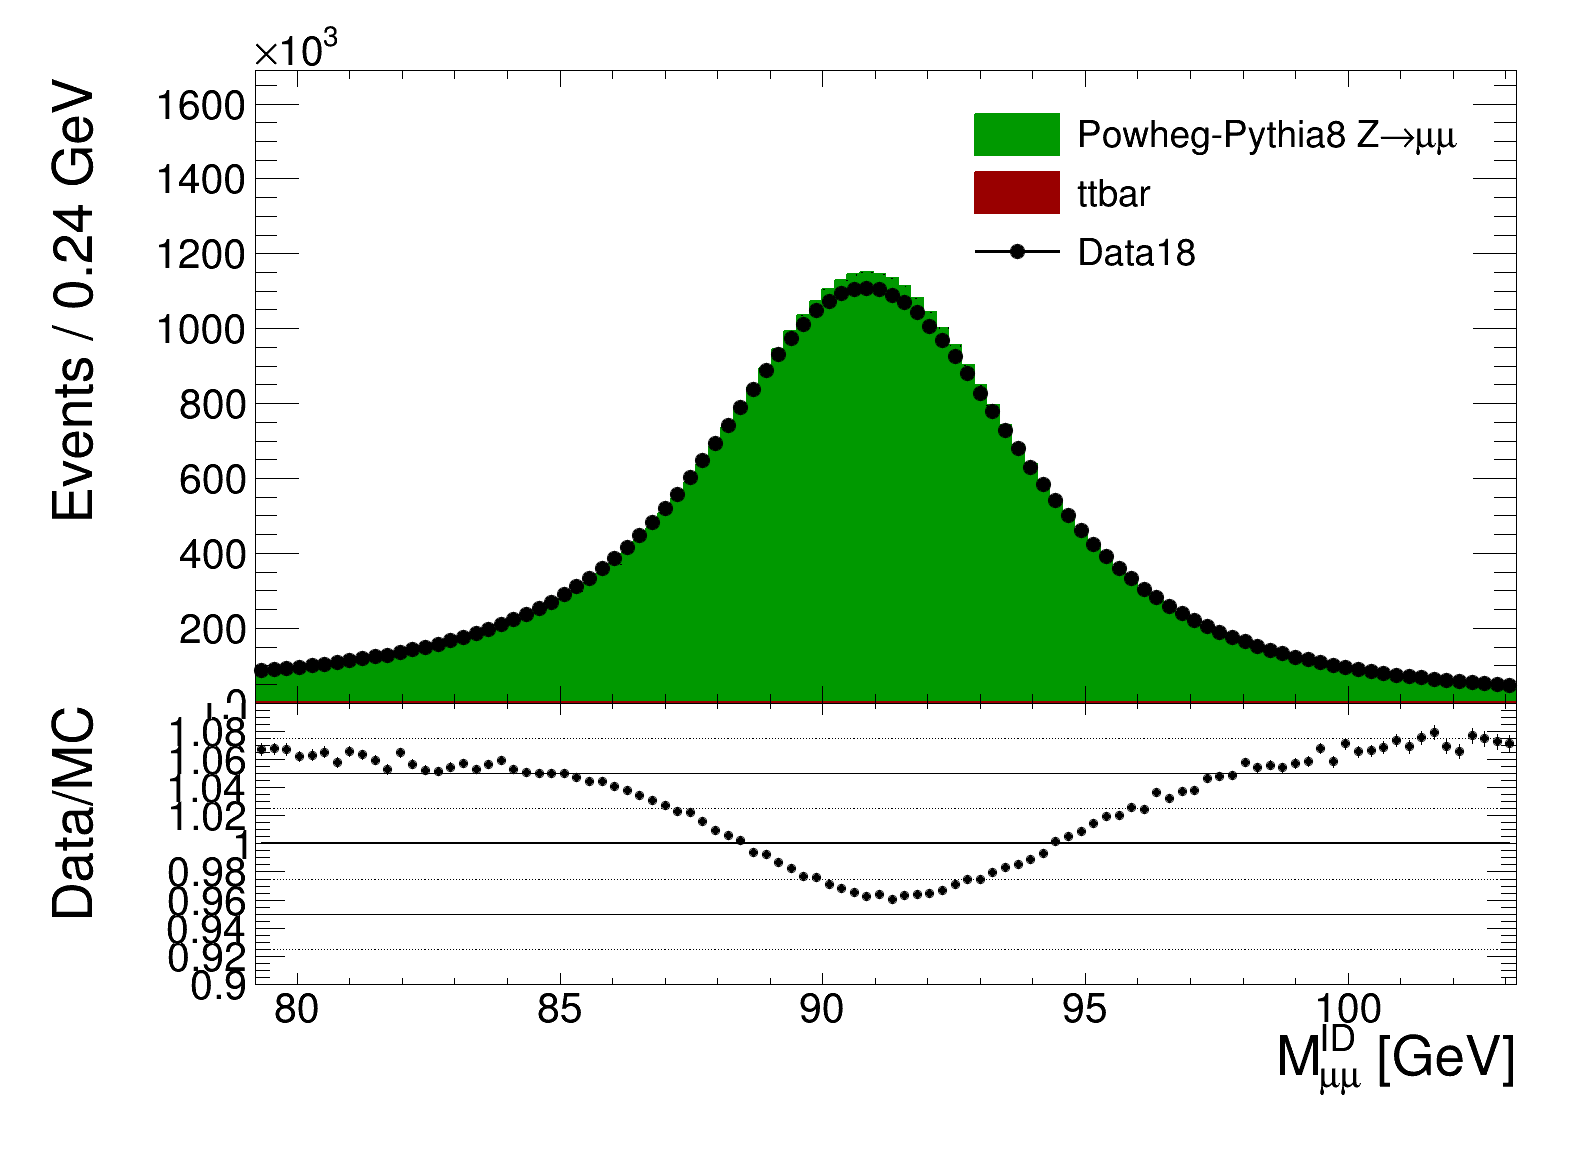

In [3]:
#plot mc16a

hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT

files = {}
files["FullCovCBComb"] = "/project/def-psavard/ladamek/momentumvalidationoutput/May16_defaultcorr_fullcovcbcomb_latest_mc_v05_standardvars_matrix/Output.root"
files["Default"] = "/project/def-psavard/ladamek/momentumvalidationoutput/Apr18_defaultcorr_latest_mc_v05_standardvars_matrix/Output.root"
files["SimpleCBComb"] = "/project/def-psavard/ladamek/momentumvalidationoutput/Apr18_defaultcorr_simplecbcomb_latest_mc_v05_standardvars_matrix/Output.root"

results = {"Comb":[],"track type": [], "Mean [GeV]": [], "Mean Err [GeV]": [], "RMS [GeV]": [], "RMS Err [GeV]": [], "Generator":[], "Period":[]}

for varname in ["ID"]:
    for period in ["1516", "17", "18"]:
        for cb_kind in ["FullCovCBComb"]:#, "Default"]:#, "Default", "SimpleCBComb"]:
            print(cb_kind)
            hm = HistogramManager(files[cb_kind])
            mc = "MC{}".format(period)
            data = "Data{}".format(period)
            ttbar = "MCTTbar{}".format(period)
            hname = hname_base.format(varname)
            histograms = hm.get_histograms(hname, channels=[mc, data, ttbar])
            mc_total = histograms[mc].Integral() + histograms[ttbar].Integral()
            scale_to_data = histograms[data].Integral() / mc_total
            histograms[mc].Scale(scale_to_data)
            histograms[ttbar].Scale(scale_to_data)
        
            for key in histograms:
                print("Mean, {} {} {}".format(varname, key, histograms[key].GetMean()))
                print("RMS, {} {} {}".format(varname, key, histograms[key].GetRMS()))
                results["track type"].append(varname)
                if "MC" in key: results["Generator"].append("PP8")
                if "Data" in key: results["Generator"].append("Data")
                results["Period"].append(period)
                results["Mean [GeV]"].append(histograms[key].GetMean())
                results["Mean Err [GeV]"].append(histograms[key].GetMeanError())
                results["RMS [GeV]"].append(histograms[key].GetRMS())
                results["RMS Err [GeV]"].append(histograms[key].GetRMSError())
                results["Comb"].append(cb_kind)
            
            ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.90,\
                    ratio_max = 1.1,\
                    colours = {mc:ROOT.kGreen +2,ttbar:ROOT.kRed +2, data:ROOT.kBlack},\
                    legend_labels = {data:"Data{}".format(period), mc:"Powheg-Pythia8 Z#rightarrow#mu#mu",ttbar:"ttbar"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.85),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = data)

Applying ATLAS style settings
ID MC RMS: 4.122253369118737
ID Data RMS: 4.218777948447532
CB MC RMS: 3.781556048989147
CB Data RMS: 3.8653389002365506
ME MC RMS: 4.36797945624086
ME Data RMS: 4.469859194538646


KeyError: 'MCCalib'

Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC MassSpectrum_ID_InclusiveMCTTbar MassSpectrum_ID_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_CB_InclusiveMC MassSpectrum_CB_InclusiveMCTTbar MassSpectrum_CB_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ME_InclusiveMC MassSpectrum_ME_InclusiveMCTTbar MassSpectrum_ME_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC MassSpectrum_ID_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_CB_InclusiveMC MassSpectrum_CB_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ME_InclusiveMC MassSpectrum_ME_InclusiveData.pdf has been created


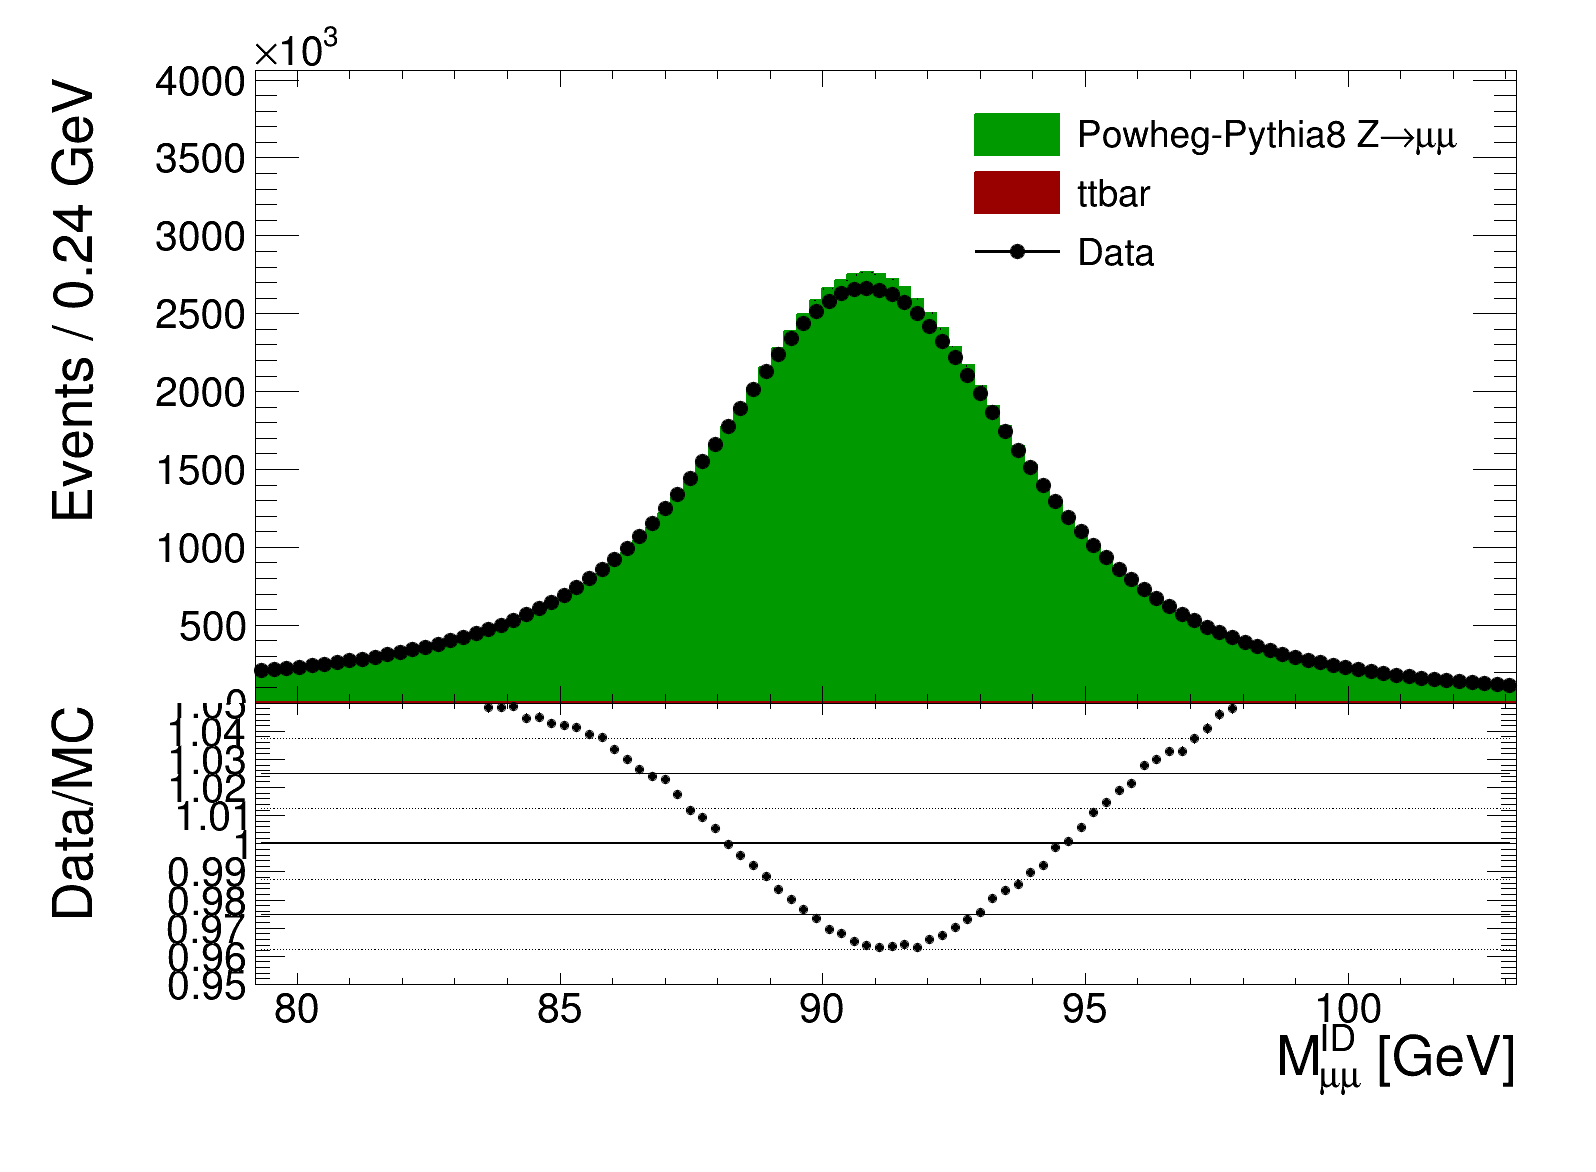

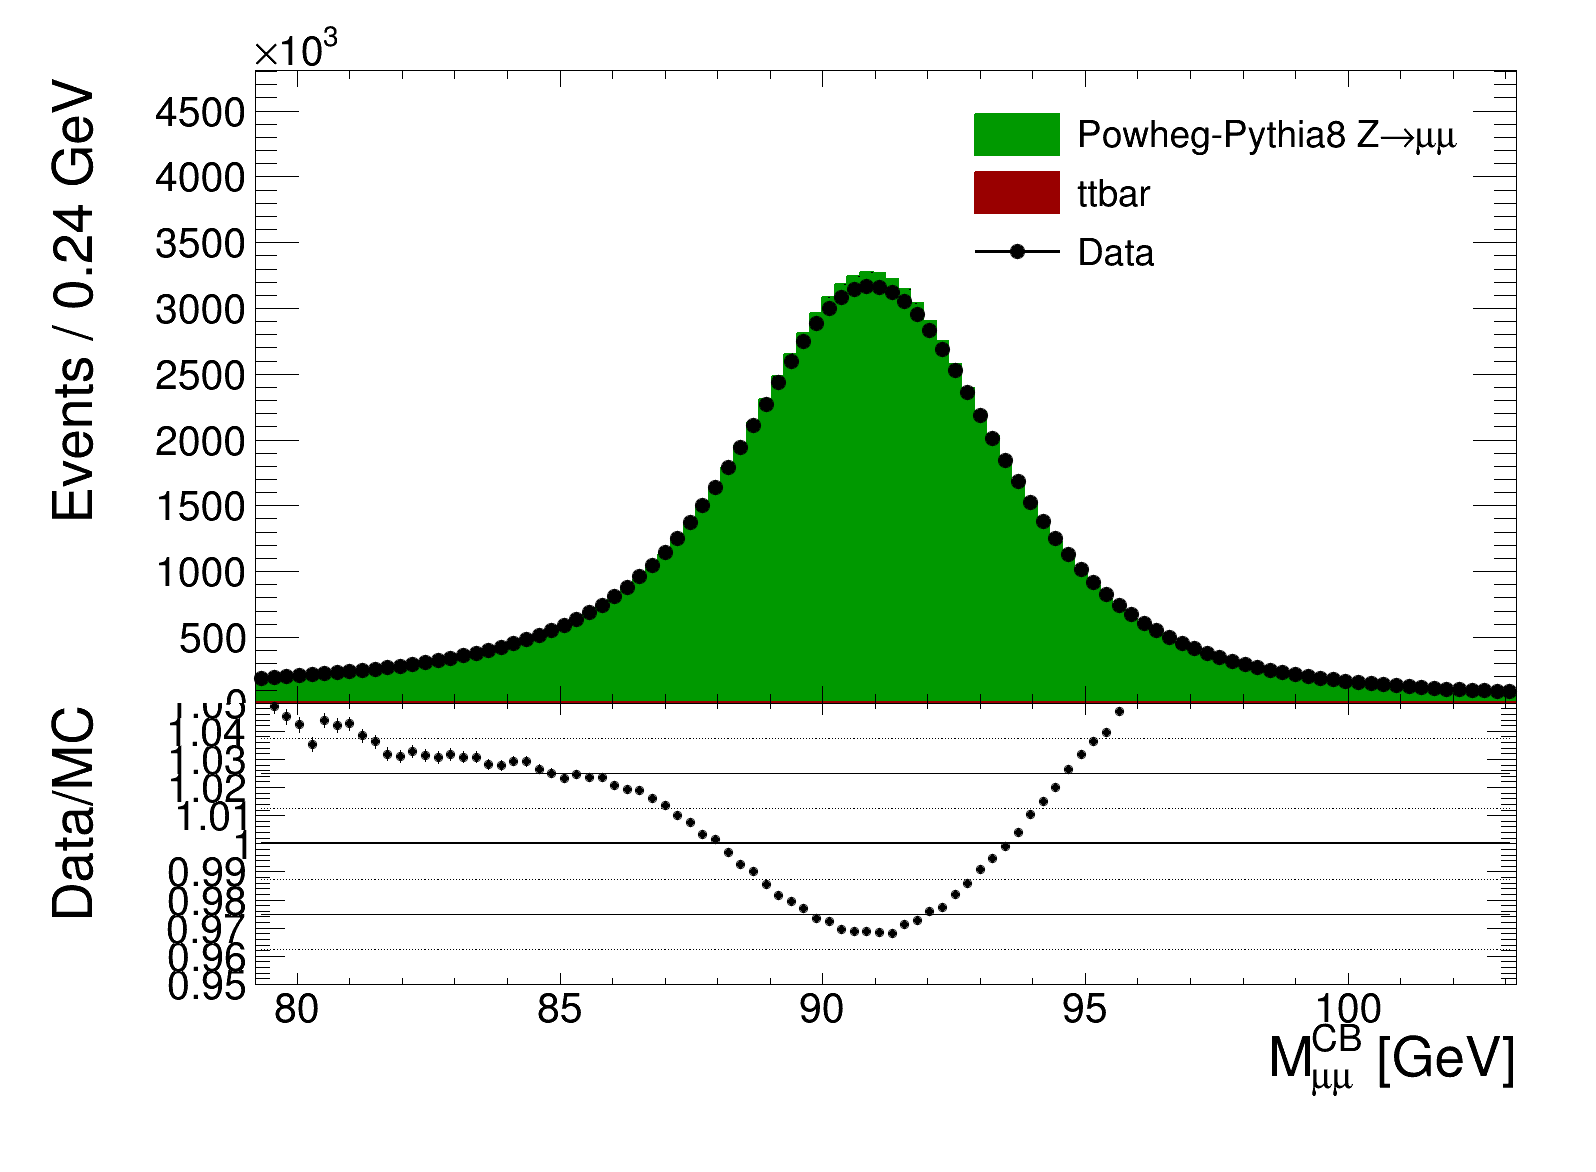

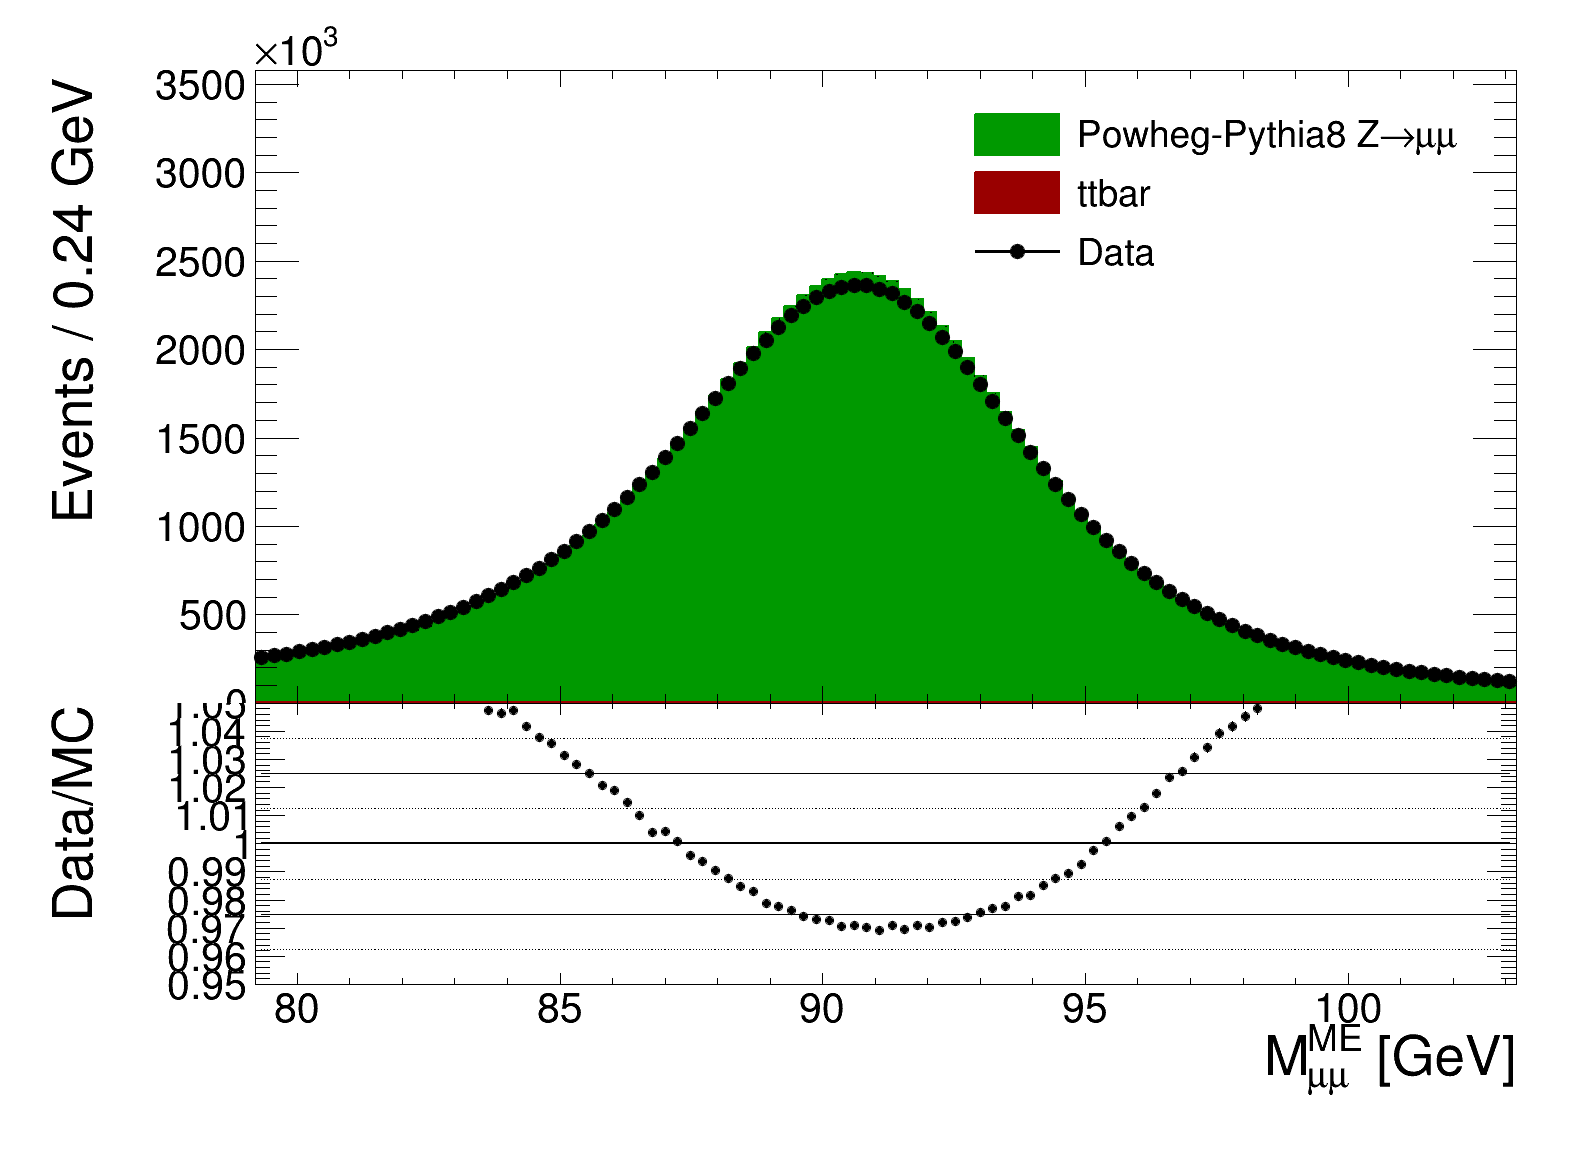

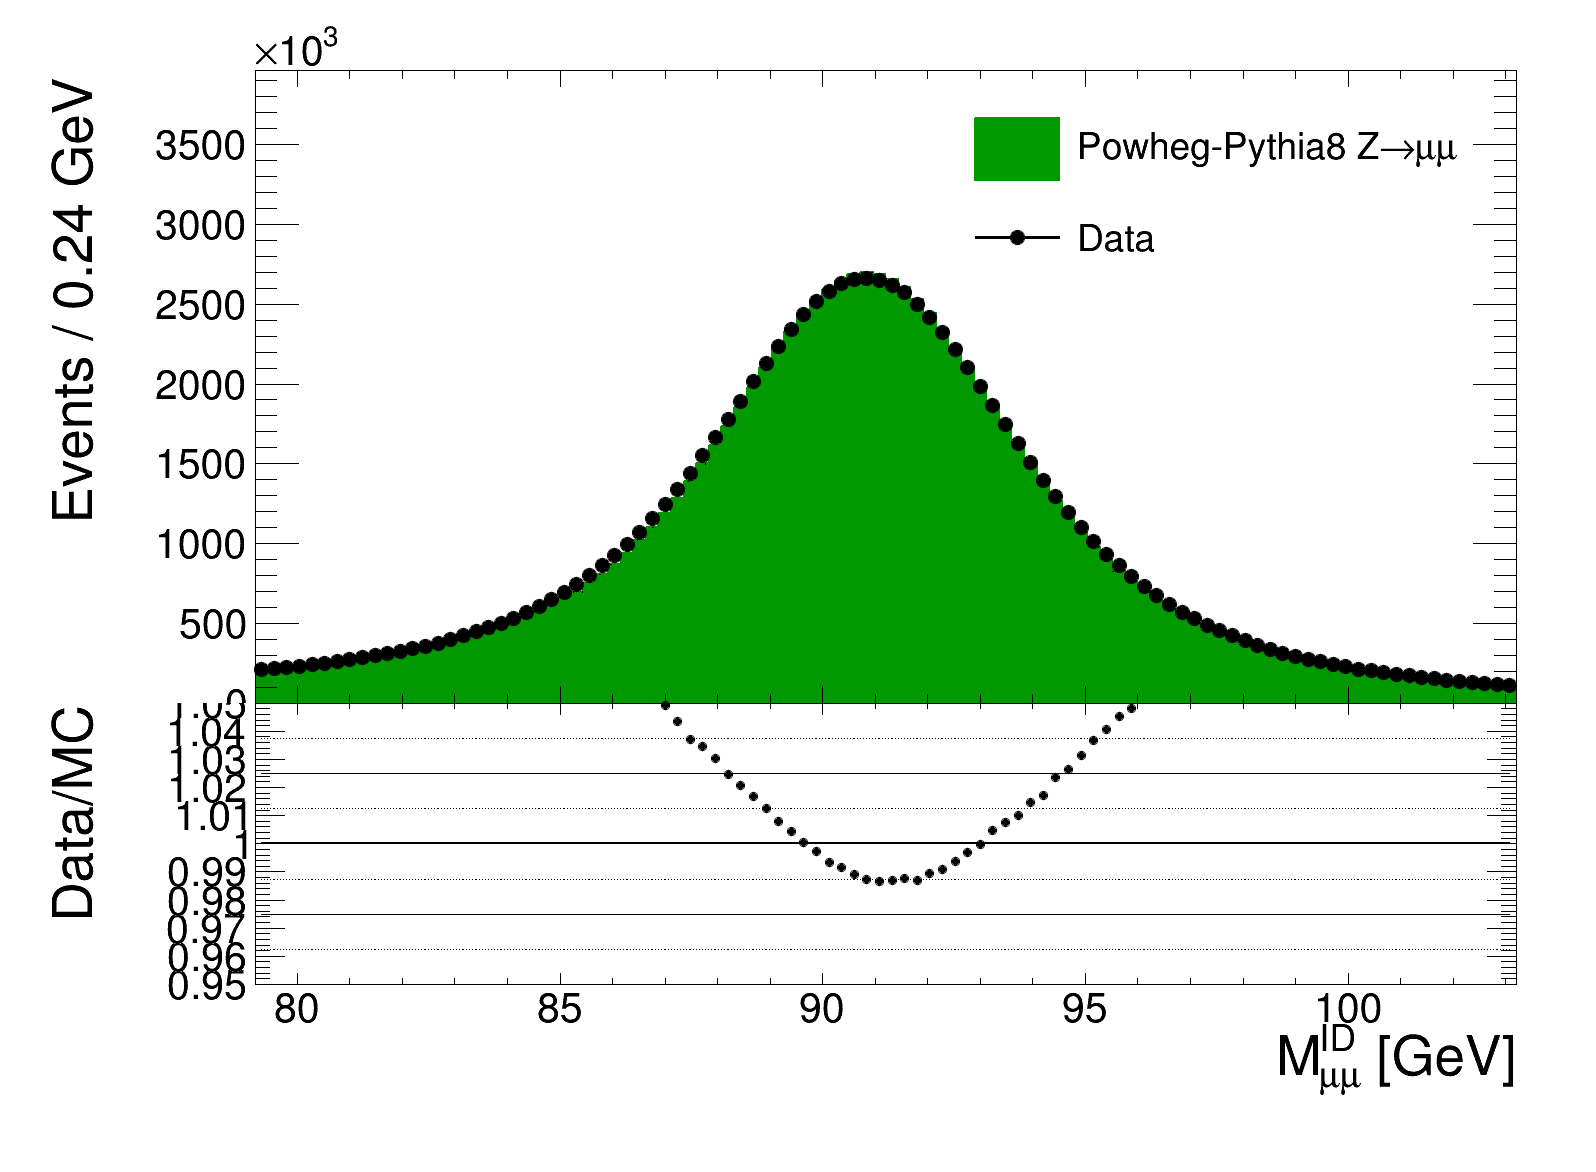

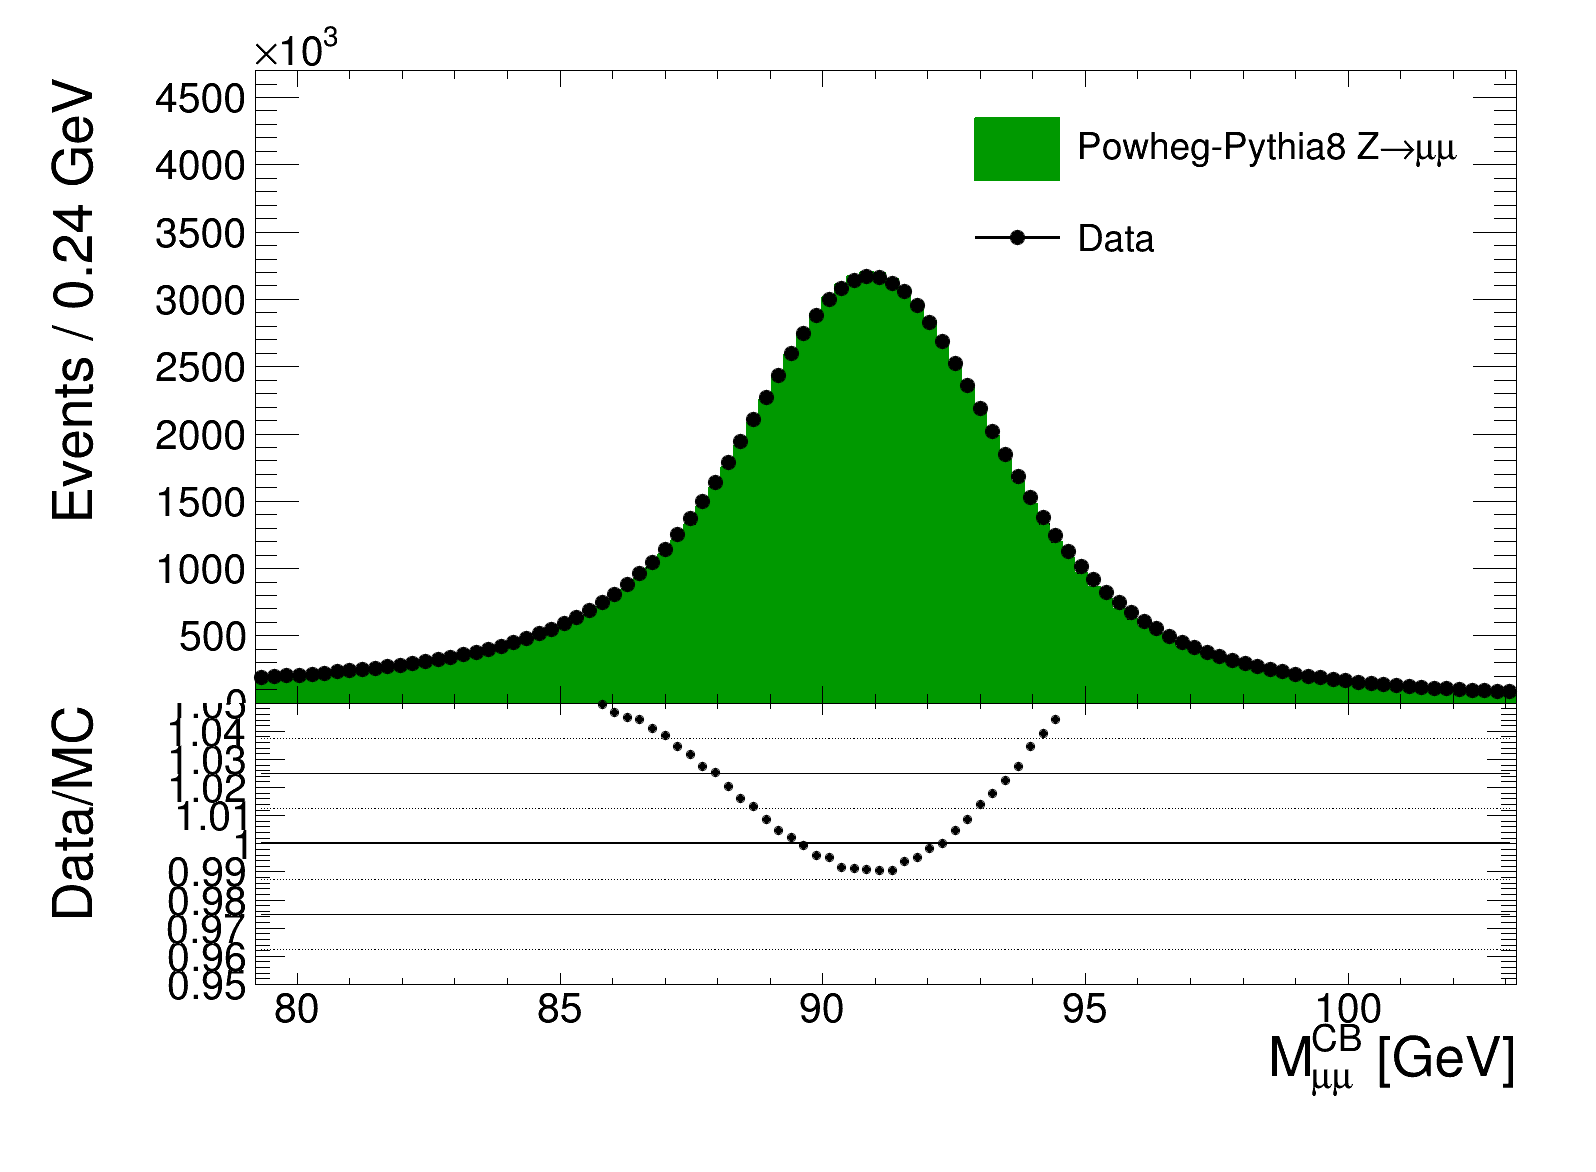

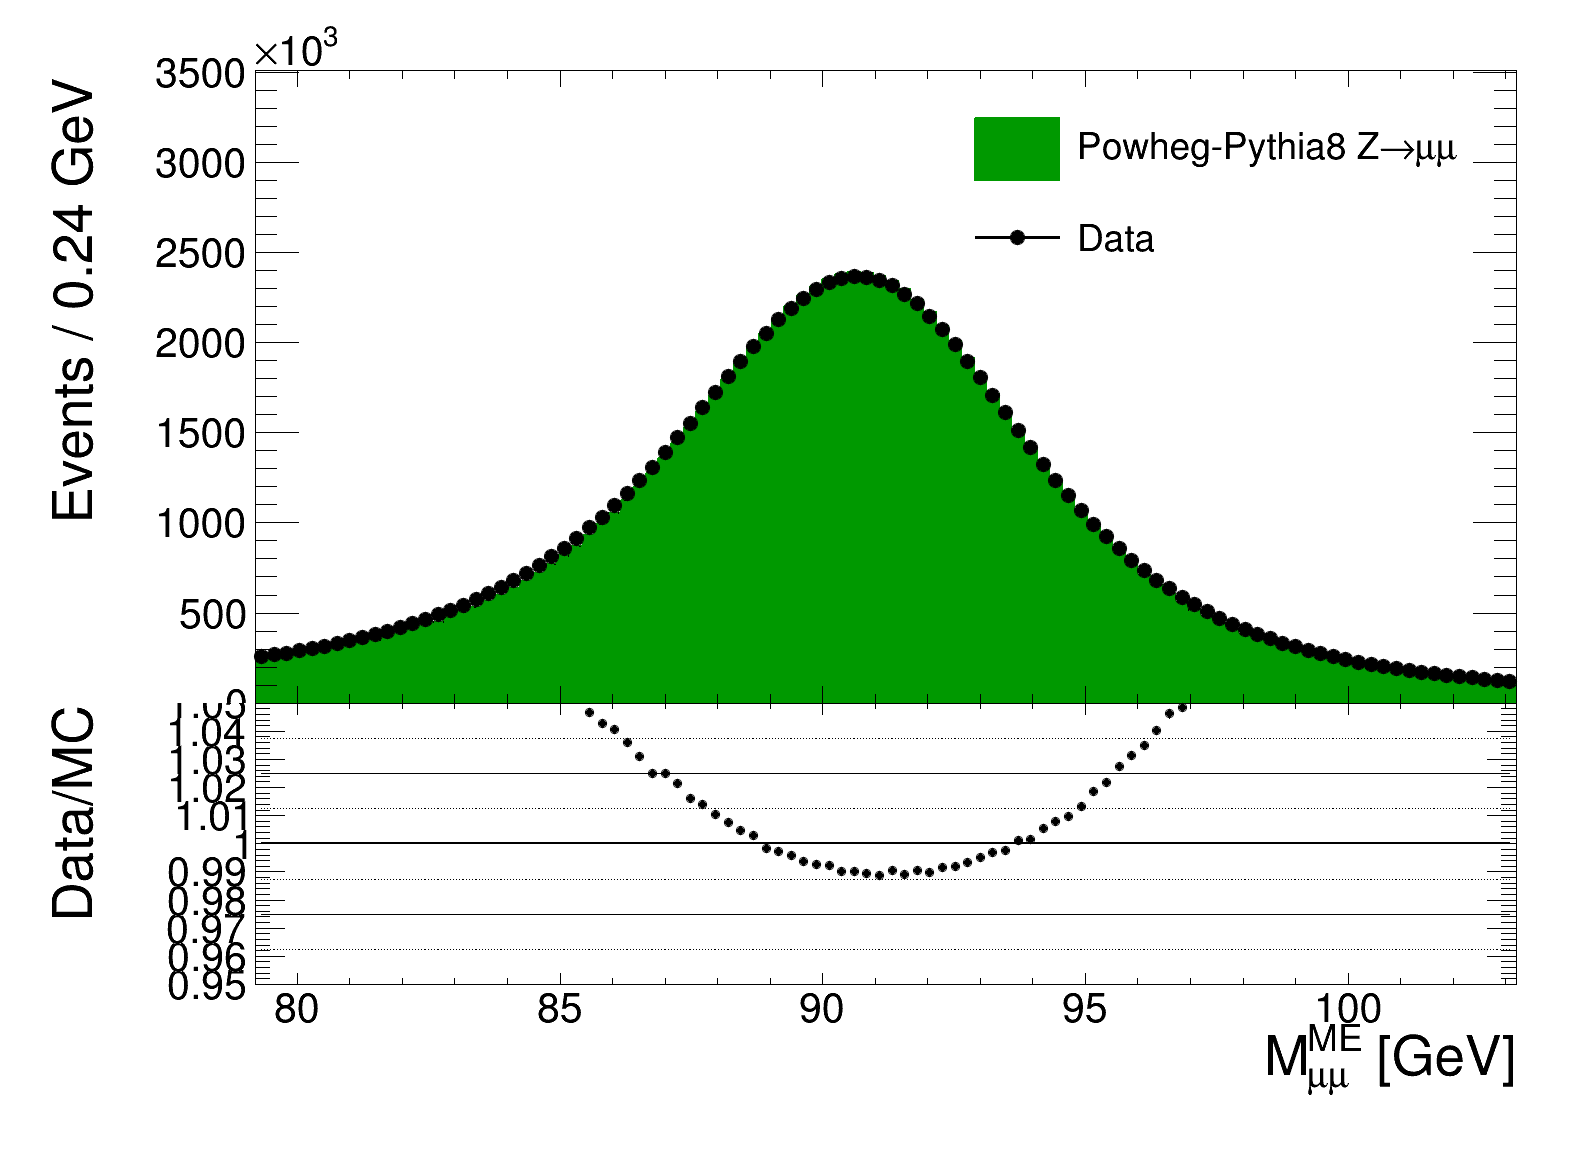

In [15]:
hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID","CB", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MC", "MCTTbar", "Data"])
    data_scale = histograms["Data"].Integral()
    histograms["MC"].Scale(data_scale/histograms["MC"].Integral())
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.95,\
                    ratio_max = 1.05,\
                    colours = {"MC":ROOT.kGreen +2,"MCTTbar":ROOT.kRed +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu","MCTTbar":"ttbar"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.85),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
results_table = {}
results_table["RMS [GeV]"] = []
results_table["Data or MC"] = []
results_table["Track Type"] = []
import ROOT
for varname in ["ID", "CB", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MC", "Data"])
    for key in histograms:
        print("{} {} RMS: {}".format(varname, key, histograms[key].GetRMS()))
        results_table["RMS [GeV]"].append(histograms[key].GetRMS())
        results_table["Data or MC"].append(key)
        results_table["Track Type"].append(varname)
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.95,\
                    ratio_max = 1.05,\
                    colours = {"MC":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.85),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")
    
    
hname_base = "Pair_{}_Pt"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCCalib", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.95,\
                    ratio_max = 1.05,\
                    colours = {"MCCalib":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCCalib":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.85),\
                    x_axis_label = "P_{T, #mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=True,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

In [ ]:
hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCSherpa", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCSherpa":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCSherpa":"Sherpa Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

import pandas
results = {"track type": [], "Mean [GeV]": [], "Mean Err [GeV]": [], "RMS [GeV]": [], "RMS Err [GeV]": [], "Generator":[]}
canvases = []
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MC", "MCSherpa"])
    for key in histograms:
        print("Mean, {} {} {}".format(varname, key, histograms[key].GetMean()))
        print("RMS, {} {} {}".format(varname, key, histograms[key].GetRMS()))
        results["track type"].append(varname)
        if key == "MCSherpa": results["Generator"].append("Sherpa")
        if key == "MC": results["Generator"].append("PP8")
        results["Mean [GeV]"].append(histograms[key].GetMean())
        results["Mean Err [GeV]"].append(histograms[key].GetMeanError())
        results["RMS [GeV]"].append(histograms[key].GetRMS())
        results["RMS Err [GeV]"].append(histograms[key].GetRMSError())

    c = ROOT.TCanvas("Histogram{}".format(varname), "Histogram{}".format(varname))
    histograms["MC"].Scale(histograms["MCSherpa"].Integral()/histograms["MC"].Integral())
    histograms["MC"].Divide(histograms["MCSherpa"])
    histograms["MC"].GetYaxis().SetTitle("PP8/Sherpa")
    histograms["MC"].Draw()
    c.Draw()
    canvases.append(c)

dataframe = pandas.DataFrame.from_dict(results)
print(dataframe.to_latex(formatters={"Mean [GeV]": lambda x: "{:.4f}".format(x), "RMS [GeV]": lambda x: "{:.4f}".format(x), "Mean Err [GeV]": lambda x: "{:.4f}".format(x), "RMS Err [GeV]": lambda x: "{:.4f}".format(x)}))

hname_base = "Pair_{}_Pt"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCSherpa", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCSherpa":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCSherpa":"Sherpa Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "P_{T, #mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=True,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

In [ ]:
Neg_histograms = ["Neg_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]
Pos_histograms = ["Pos_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]

In [ ]:
hist_cache = {}
canvases = []
from IterativeBiasCorrection import calculate_sagitta_bias
import ROOT
from binnings import global_pt_binning, global_pt_binning_zipped

def draw_text(x, y, text, color=ROOT.kBlack, size=0.05):
    '''Draw text.
    Parameters
    ----------
    x : float
        x position in NDC coordinates
    y : float
        y position in NDC coordinates
    text : string, optional
        The text
    color : int, optional
        Text colour (the default is 1, i.e. black).
        See https://ROOT.cern.ch/doc/master/classTColor.html.
        If you know the hex code, rgb values, etc., use ``ROOT.TColor.GetColor()``
    size : float, optional
        Text size
        See https://ROOT.cern.ch/doc/master/classTLatex.html
    '''
    l = ROOT.TLatex()
    l.SetTextSize(size)
    l.SetNDC()
    l.SetTextColor(color)
    l.DrawLatex(x, y, text)
#@title_style = ROOT.gStyle.GetOptTitle()
#print(title_style)
#from style import set_style, get_atlas_style
#astyle = get_atlas_style()
#astyle.SetOptTitle(title_style)
#set_style(astyle)
from atlasplots import set_atlas_style, atlas_label
set_atlas_style()
print(dir(atlasplots))
for Pos_histogram, Neg_histogram, binlow, binhigh in zip(Pos_histograms,\
                                                         Neg_histograms,\
                                                         global_pt_binning[:-1],\
                                                         global_pt_binning[1:]):
    description = r"{:.1f} < {} < {:.1f}".format(binlow, "P_{T}^{ID}", binhigh)
    
    
    h_pos = hm.get_histograms(Pos_histogram)
    hist_cache[Pos_histogram] = h_pos
    h_neg = hm.get_histograms(Neg_histogram)
    hist_cache[Neg_histogram] = h_neg
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram))
    h_pos["Data"].Draw("COLZ")
    h_pos["Data"].GetYaxis().SetTitleOffset(0.7*h_pos["Data"].GetYaxis().GetTitleOffset())
    canvases[-1].SetTopMargin(0.1)
    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()
    
    ROOT.gStyle.SetPalette(ROOT.kTemperatureMap)

    bias_hist = calculate_sagitta_bias(h_pos["Data"], h_neg["Data"])
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram + "Sagitta"))
    bias_hist.Draw("COLZ")
    bias_hist.SetMinimum(-0.15)
    bias_hist.SetMaximum(0.15)
    bias_hist.SetTitle(description)
    bias_hist.GetYaxis().SetTitleOffset(0.7*bias_hist.GetYaxis().GetTitleOffset())
    bias_hist.GetXaxis().SetTitleOffset(0.8*bias_hist.GetXaxis().GetTitleOffset())
    bias_hist.GetZaxis().SetTitleOffset(1.25*bias_hist.GetZaxis().GetTitleOffset())
    hist_cache["bias_hist{}".format(bias_hist.GetName())] = bias_hist

    canvases[-1].SetTopMargin(0.1)
    canvases[-1].cd()

    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()

In [ ]:
histograms = ["Pos_CB_Mass_Histogram_{}".format(i) for i in range(0, 12)]
from plotting_utils import draw_data_vs_mc
for hname in histograms:
    histograms = hm.get_histograms(hname)
    draw_data_vs_mc(histograms,\
                    ratio_min = 0.9,\
                    ratio_max = 1.1,\
                    colours = {"MC":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

In [14]:
import pandas as pd
frame = pd.DataFrame.from_dict(results)
frame

,Comb,track type,Mean [GeV],Mean Err [GeV],RMS [GeV],RMS Err [GeV],Generator,Period
0,SimpleCBComb,CB,90.538264,0.000385,3.678358,0.000272,PP8,1516
1,SimpleCBComb,CB,90.550267,0.000792,3.749377,0.000560,Data,1516
2,CBComb,CB,90.631458,0.000387,3.695411,0.000273,PP8,1516
3,CBComb,CB,90.669771,0.000795,3.767827,0.000562,Data,1516
4,Default,CB,90.571425,0.000379,3.628648,0.000268,PP8,1516
5,Default,CB,90.548887,0.000783,3.710061,0.000553,Data,1516
6,SimpleCBComb,CB,90.585317,0.000360,3.754458,0.000254,PP8,17
7,SimpleCBComb,CB,90.557105,0.000732,3.773094,0.000517,Data,17
8,CBComb,CB,90.674641,0.000358,3.745729,0.000253,PP8,17
9,CBComb,CB,90.678743,0.000733,3.786759,0.000519,Data,17


In [15]:
print(frame.query("Generator==\"PP8\"").to_latex(formatters={"RMS [GeV]":lambda x : "{:.2f}".format(x)}, index=False))

\begin{tabular}{llrrrrll}
\toprule
         Comb & track type &  Mean [GeV] &  Mean Err [GeV] & RMS [GeV] &  RMS Err [GeV] & Generator & Period \\
\midrule
 SimpleCBComb &         CB &   90.538264 &        0.000385 &      3.68 &       0.000272 &       PP8 &   1516 \\
       CBComb &         CB &   90.631458 &        0.000387 &      3.70 &       0.000273 &       PP8 &   1516 \\
      Default &         CB &   90.571425 &        0.000379 &      3.63 &       0.000268 &       PP8 &   1516 \\
 SimpleCBComb &         CB &   90.585317 &        0.000360 &      3.75 &       0.000254 &       PP8 &     17 \\
       CBComb &         CB &   90.674641 &        0.000358 &      3.75 &       0.000253 &       PP8 &     17 \\
      Default &         CB &   90.573759 &        0.000348 &      3.64 &       0.000246 &       PP8 &     17 \\
 SimpleCBComb &         CB &   90.586198 &        0.000320 &      3.75 &       0.000226 &       PP8 &     18 \\
       CBComb &         CB &   90.675738 &        0.000318 &

In [16]:
print(frame.query("Generator==\"Data\"").to_latex(formatters={"RMS [GeV]":lambda x : "{:.2f}".format(x)}, index=False))

\begin{tabular}{llrrrrll}
\toprule
         Comb & track type &  Mean [GeV] &  Mean Err [GeV] & RMS [GeV] &  RMS Err [GeV] & Generator & Period \\
\midrule
 SimpleCBComb &         CB &   90.550267 &        0.000792 &      3.75 &       0.000560 &      Data &   1516 \\
       CBComb &         CB &   90.669771 &        0.000795 &      3.77 &       0.000562 &      Data &   1516 \\
      Default &         CB &   90.548887 &        0.000783 &      3.71 &       0.000553 &      Data &   1516 \\
 SimpleCBComb &         CB &   90.557105 &        0.000732 &      3.77 &       0.000517 &      Data &     17 \\
       CBComb &         CB &   90.678743 &        0.000733 &      3.79 &       0.000519 &      Data &     17 \\
      Default &         CB &   90.556015 &        0.000723 &      3.73 &       0.000511 &      Data &     17 \\
 SimpleCBComb &         CB &   90.558799 &        0.000640 &      3.78 &       0.000452 &      Data &     18 \\
       CBComb &         CB &   90.681371 &        0.000640 &